### Linear Regression on Student Performance Dataset

#### Step 1: Loading Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Dataset
df = pd.read_csv(r"E:\Datasets\student_performance.csv", delimiter=';')

#### Step 2: Data Preprocessing

In [3]:
df.shape

(395, 33)

In [4]:
pd.set_option("display.max_columns", 33)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

In [8]:
# Data types
df.dtypes.value_counts()

object    17
int64     16
dtype: int64

In [9]:
# Categorical Columns
cat_cols

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [10]:
# Numerical Columns
num_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

##### Checking Target Variable 

Target Variable Distribution (G3): 


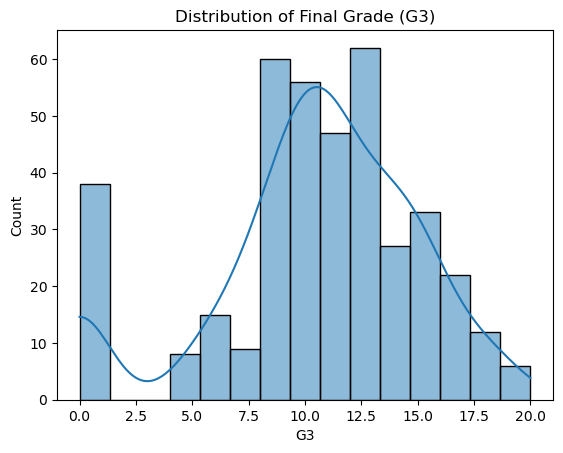

In [11]:
print("Target Variable Distribution (G3): ")
sns.histplot(df['G3'], bins=15, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.show()

##### Data Cleaning - constant features

In [12]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Dropping constant columns: {constant_features}")
df.drop(columns=constant_features, inplace=True)

Dropping constant columns: {constant_features}


In [13]:
df.shape # no constant features

(395, 33)

#### Step 3: Missing Values and duplicates

In [14]:
df.isnull().sum().sum()  # no null values in dataset

0

In [15]:
duplicates = df.duplicated()
df[duplicates].sum().sum()

0.0

In [16]:
df.shape  # which means no duplicates

(395, 33)

#### Step 4: Outlier Detection

In [17]:
# To remove outliers using IQR in numerical cols
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 *IQR) & (df[col] <= Q3 + 1.5*IQR)]
print(f"Shape after removing outliers: {df.shape}")

Shape after removing outliers: (219, 33)


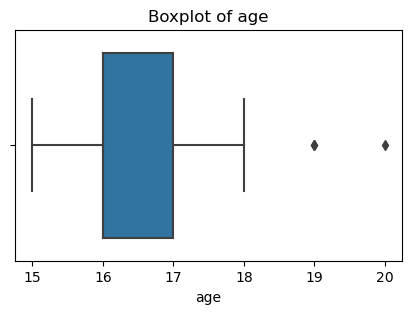

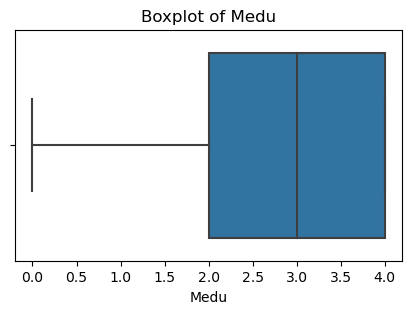

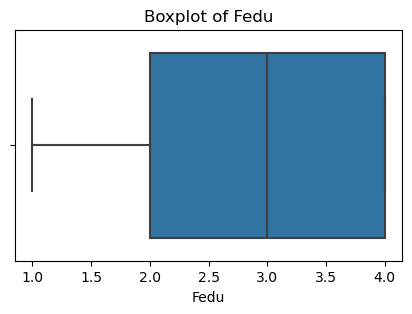

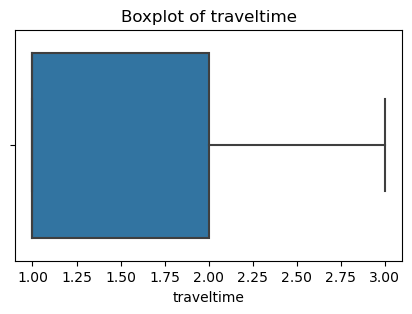

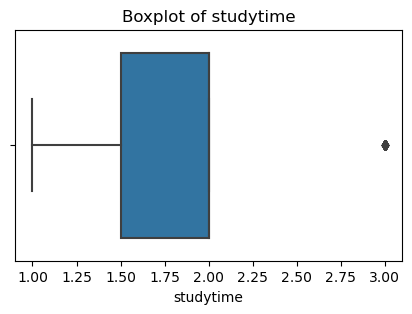

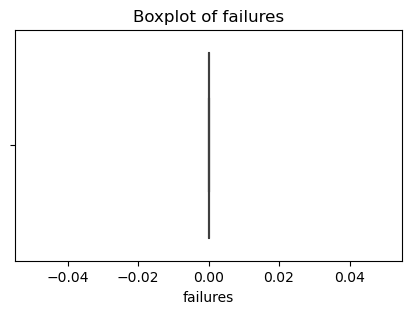

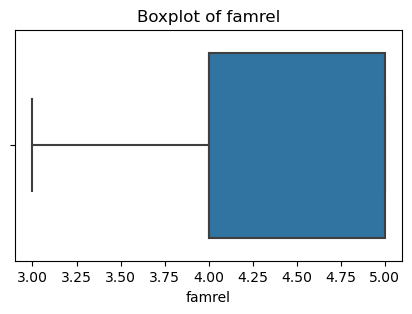

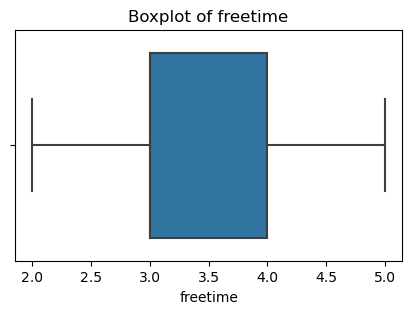

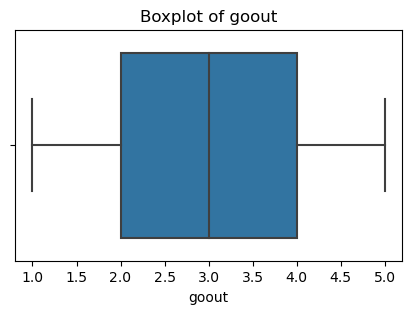

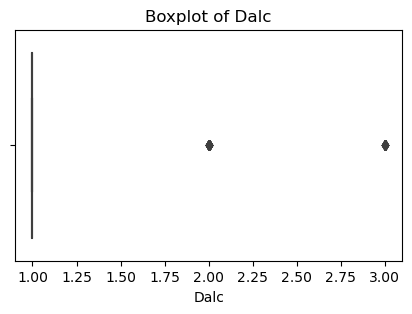

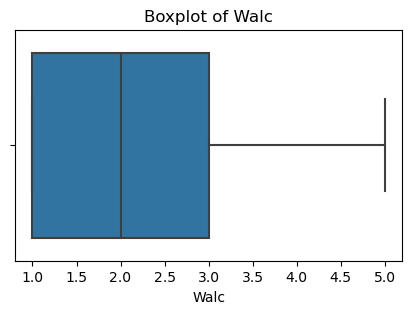

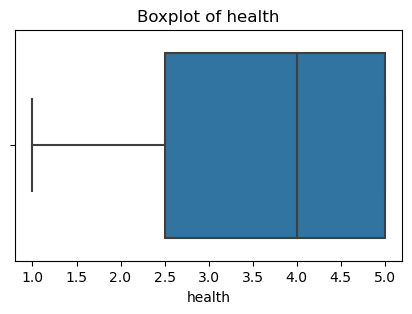

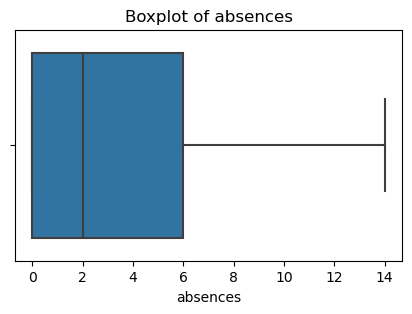

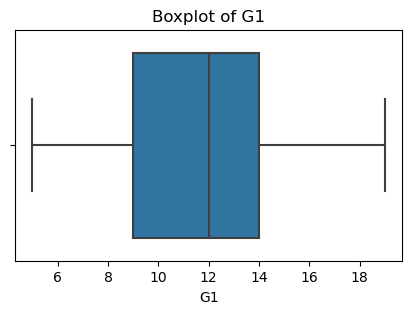

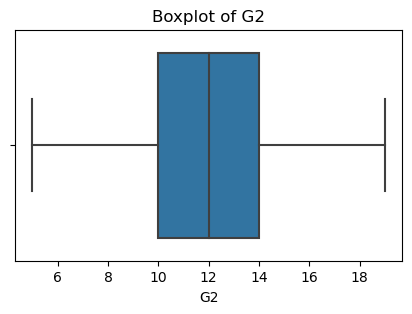

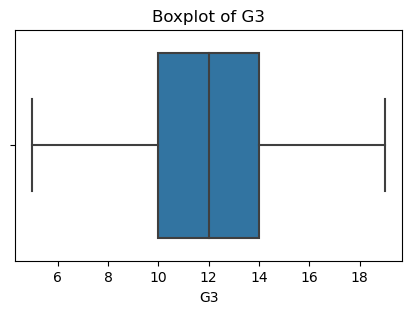

In [18]:
# Box Plot to visualize outliers before and after removing
# Boxplot to visualize outliers before and after removing
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Step 5: Feature Encoding / Engineering -Categorical Variables

In [19]:
label_encoder = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column {col} is not found in DataFrame")

#### Step 6: Train and Test Sets

In [20]:
X = df.drop('G3', axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

#### Step 7: Feature Scaling 

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Step 8: Model Building

In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [23]:
y_pred = lr_model.predict(X_test_scaled)

#### Step 9: Evaluate the Model Performance

In [24]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance: ")
print(f"{'Root Mean Squared Error (RMSE)':<30}: {rmse:.4f}")
print(f"{'Mean Absolute Error (MAE)':<30}: {mae:.4f}")
print(f"{'R2 Score':<30}: {r2:.4f}")

Model Performance: 
Root Mean Squared Error (RMSE): 1.2902
Mean Absolute Error (MAE)     : 1.0805
R2 Score                      : 0.8108


#### Step 10: Conclusion

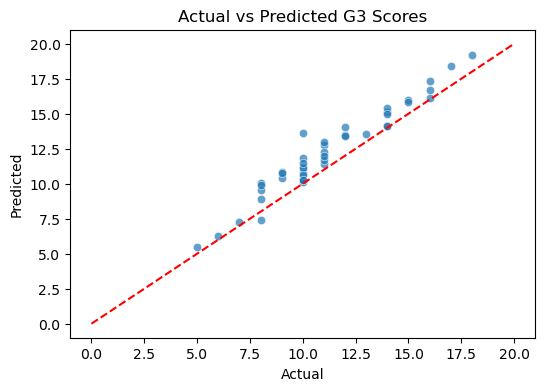

In [25]:

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([0,20], [0,20], color='red', linestyle='--')
plt.title('Actual vs Predicted G3 Scores')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()